<a href="https://colab.research.google.com/github/BachokunIAR/Battery/blob/main/battery_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = green> Important Libraries

In [148]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os


In [149]:
data_house = "/content/drive/MyDrive/NASA_Battery_data"
print(os.listdir(os.path.join(data_house, )))

['B0029', 'B0027', 'B0018', 'B0006', 'B0025', 'B0030', 'B0028', 'B0005', 'B0007', 'B0026', 'B0041', 'B0033', 'B0034', 'B0040', 'B0031', 'B0039', 'B0038', 'B0042', 'B0032', 'B0036', 'B0050', 'B0047', 'B0043', 'B0045', 'B0044', 'B0052', 'B0049', 'B0046', 'B0048', 'B0051', 'B0056', 'B0054', 'B0053']


In [150]:
bat_data = (os.listdir(os.path.join(data_house, )))
bat_data

['B0029',
 'B0027',
 'B0018',
 'B0006',
 'B0025',
 'B0030',
 'B0028',
 'B0005',
 'B0007',
 'B0026',
 'B0041',
 'B0033',
 'B0034',
 'B0040',
 'B0031',
 'B0039',
 'B0038',
 'B0042',
 'B0032',
 'B0036',
 'B0050',
 'B0047',
 'B0043',
 'B0045',
 'B0044',
 'B0052',
 'B0049',
 'B0046',
 'B0048',
 'B0051',
 'B0056',
 'B0054',
 'B0053']

In [151]:
data_house

'/content/drive/MyDrive/NASA_Battery_data'

In [152]:
dff_train = os.path.join(data_house,'B0046')
dff = os.listdir(dff_train)
dff = [i for i in dff if i.endswith('.csv')]
dff

['00561.csv',
 '00566.csv',
 '00555.csv',
 '00553.csv',
 '00554.csv',
 '00557.csv',
 '00569.csv',
 '00567.csv',
 '00560.csv',
 '00559.csv',
 '00568.csv',
 '00562.csv',
 '00558.csv',
 '00564.csv',
 '00556.csv',
 '00563.csv',
 '00565.csv',
 '00591.csv',
 '00581.csv',
 '00579.csv',
 '00572.csv',
 '00576.csv',
 '00571.csv',
 '00605.csv',
 '00594.csv',
 '00595.csv',
 '00585.csv',
 '00597.csv',
 '00578.csv',
 '00584.csv',
 '00575.csv',
 '00590.csv',
 '00573.csv',
 '00587.csv',
 '00596.csv',
 '00574.csv',
 '00588.csv',
 '00592.csv',
 '00602.csv',
 '00599.csv',
 '00604.csv',
 '00580.csv',
 '00583.csv',
 '00589.csv',
 '00586.csv',
 '00582.csv',
 '00600.csv',
 '00601.csv',
 '00598.csv',
 '00577.csv',
 '00593.csv',
 '00570.csv',
 '00603.csv',
 '00638.csv',
 '00641.csv',
 '00624.csv',
 '00626.csv',
 '00639.csv',
 '00635.csv',
 '00611.csv',
 '00620.csv',
 '00608.csv',
 '00632.csv',
 '00618.csv',
 '00640.csv',
 '00610.csv',
 '00630.csv',
 '00619.csv',
 '00621.csv',
 '00637.csv',
 '00616.csv',
 '0062

In [153]:
data_path = os.path.join(dff_train, '00730.csv')
data_path

'/content/drive/MyDrive/NASA_Battery_data/B0046/00730.csv'

In [154]:
df_data = pd.read_csv(data_path,)
pd.set_option('display.max_rows', None)
df_data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,3.231089,-0.002950,13.486367,0.000,-0.007,0.000
1,3.499787,1.515621,13.377950,1.507,4.300,2.578
2,3.598281,1.516671,13.253640,1.507,4.430,10.859
3,3.658473,1.517245,13.219076,1.507,4.484,19.125
4,3.707350,1.516887,13.109241,1.507,4.532,27.453


In [155]:
df_data.shape

(1250, 6)

In [156]:
df_data.isna().sum()

Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          0
Time                    0
dtype: int64

In [157]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      1250 non-null   float64
 1   Current_measured      1250 non-null   float64
 2   Temperature_measured  1250 non-null   float64
 3   Current_charge        1250 non-null   float64
 4   Voltage_charge        1250 non-null   float64
 5   Time                  1250 non-null   float64
dtypes: float64(6)
memory usage: 58.7 KB


In [158]:
df_data.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,4.190032,0.420922,7.027244,0.418649,4.427726,5388.447184
std,0.056644,0.408074,1.493352,0.405727,0.237402,3129.073432
min,3.231089,-0.002950,5.142749,0.000000,-0.007000,0.000000
25%,4.198243,0.129952,6.050574,0.130000,4.284000,2682.062250
50%,4.199229,0.251550,6.506257,0.250000,4.349000,5384.444500
75%,4.199950,0.543462,7.449873,0.540000,4.500000,8095.945250
max,4.201887,1.517765,13.486367,1.507000,4.996000,10804.109000


In [159]:
df_data.isna().sum()

Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          0
Time                    0
dtype: int64

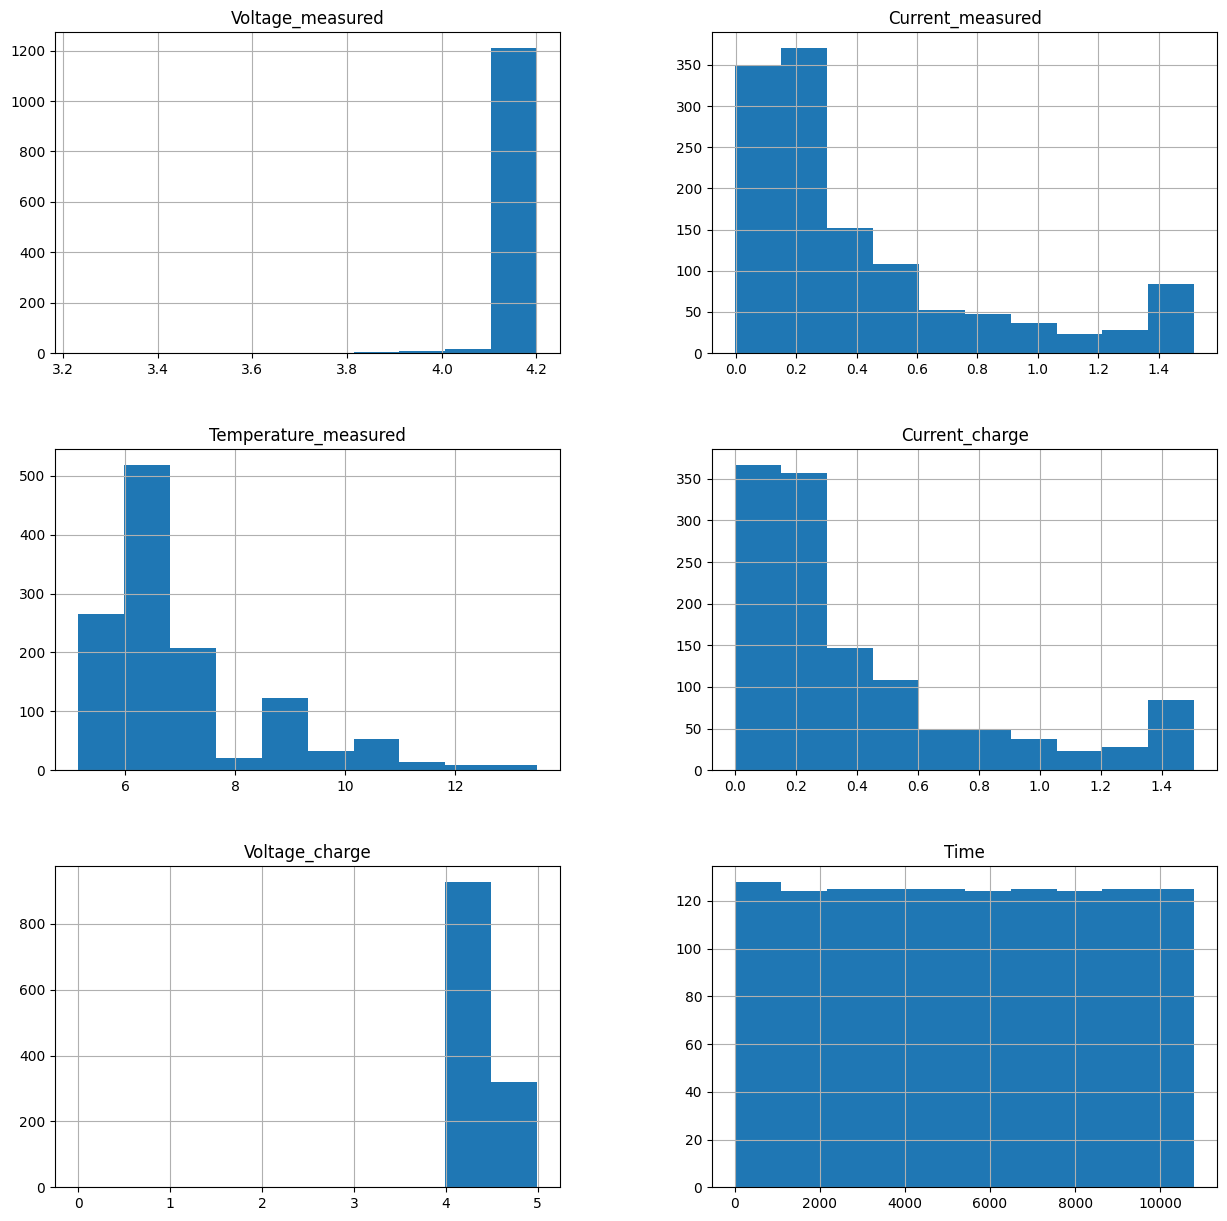

In [160]:
plt.rcParams["figure.figsize"]=[15,15]
df_data.hist();

In [161]:
def plot_test_data(df_data, profile="charge"):

    if profile=='charge':
        plt.figure(figsize=(8,3))
        plt.plot(df_data.Time, df_data.Voltage_measured, 'r', label='Voltage_measured')
        plt.plot(df_data.Time, df_data.Current_measured, 'b', label='Current_measured')

        plt.legend()
        plt.show()

        plt.figure(figsize=(8,3))
        plt.plot(df_data.Time, df_data.Voltage_charge, 'r', label='Voltage_charge')
        plt.plot(df_data.Time, df_data.Current_charge, 'b', label='Current_charge')
        plt.legend()
        plt.show()

        plt.figure(figsize=(8,3))
        plt.plot(df_data.Time, df_data.Temperature_measured, 'g', label='Temperature_measured')
        plt.xlabel("Time")
        plt.legend()
        plt.show()


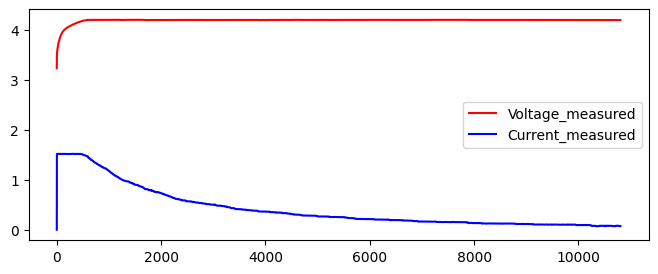

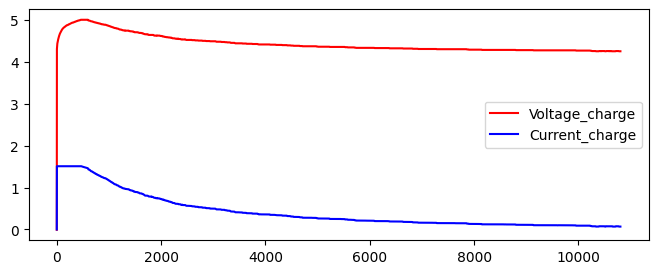

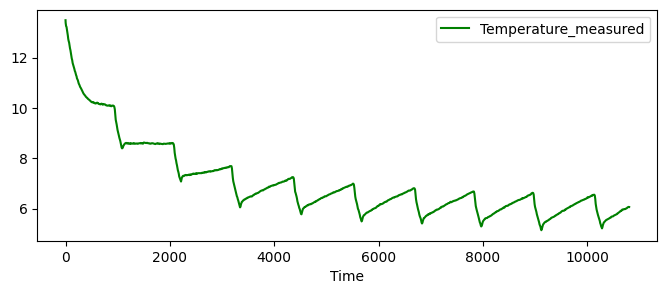

In [162]:
plot_test_data(df_data)